In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from matplotlib import image as mpimg


In [2]:
from skimage import exposure

# Função para aumentar o contraste
def enhance_contrast(img):
    img_norm = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return exposure.equalize_adapthist(img_norm, clip_limit=0.03)

In [3]:
l = 256  # Length of the image
c = l // 2  # Center of the image
ws = l // 8  # Half of window length

original = np.zeros((l, l))
original[
    c - ws : c + ws,
    c - ws : c + ws,
] = 1

In [4]:
def fft_magnitude(image):
    fft = np.fft.fft2(image)
    fft = np.fft.fftshift(fft)
    return np.abs(fft)

In [ ]:
from scipy.ndimage import map_coordinates

def rotate_image(image, theta):
    # Pega as dimensões da imagem
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotated = np.zeros_like(image)

    # Cria grid de coordenadas de destino
    y_indices, x_indices = np.indices((h, w))
    x_c = x_indices - center[0]
    y_c = y_indices - center[1]

    # Aplica a rotação inversa para encontrar as coordenadas de origem
    cos_t = np.cos(np.radians(theta))
    sin_t = np.sin(np.radians(theta))
    x_src = cos_t * x_c + sin_t * y_c + center[0]
    y_src = -sin_t * x_c + cos_t * y_c + center[1]

    # Interpola os valores da imagem original nas novas coordenadas
    rotated = map_coordinates(image, [y_src.ravel(), x_src.ravel()], order=1, mode='constant', cval=0)
    rotated = rotated.reshape((h, w))
    return rotated

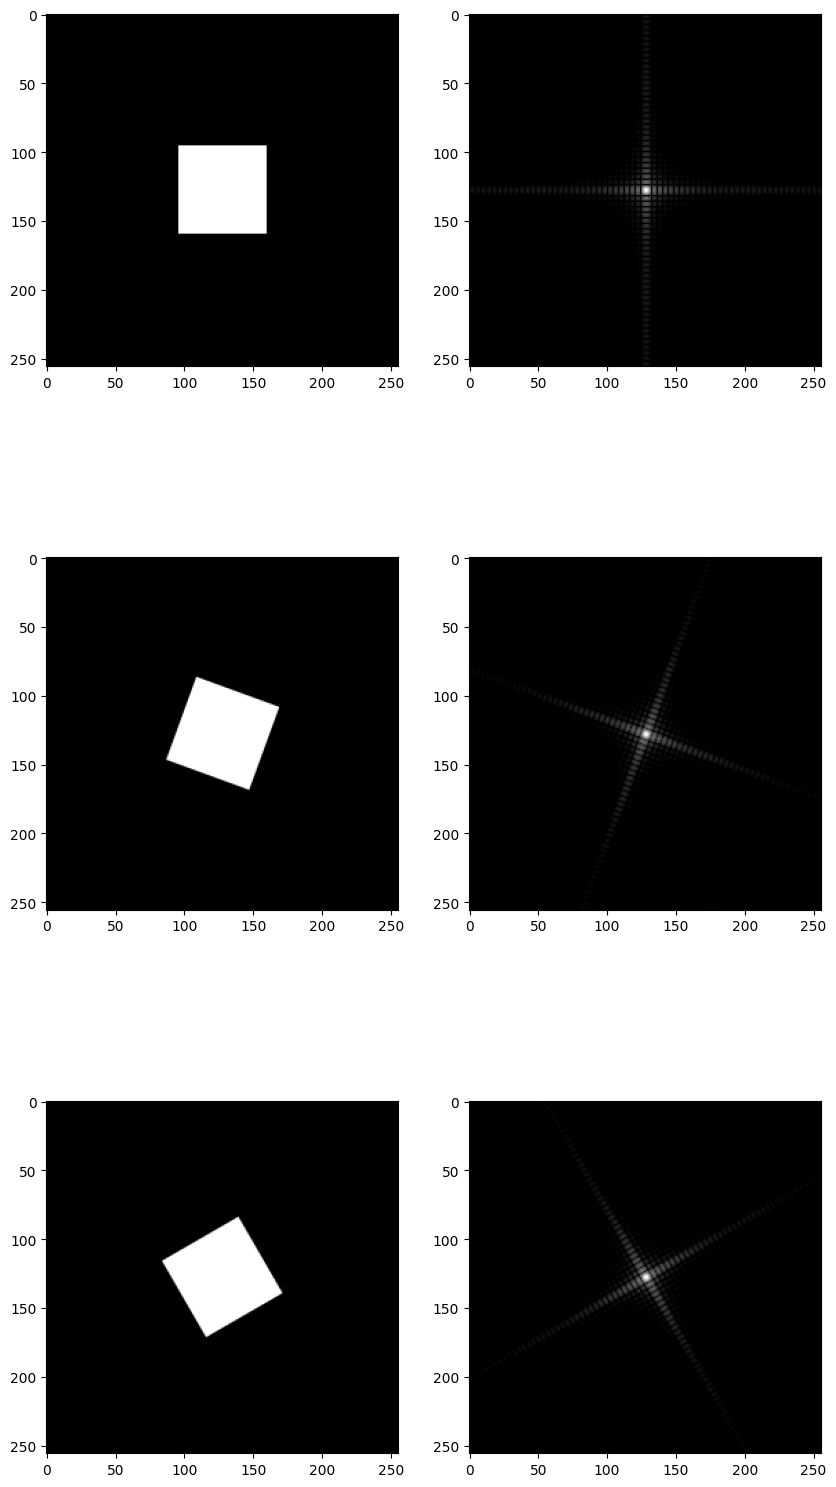

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(10, 20))
axs = axs.flatten()

axs[0].imshow(original, cmap="gray")
axs[1].imshow(enhance_contrast(fft_magnitude(original)), cmap="gray")

rotated_20 = rotate_image(original, 20)
axs[2].imshow(rotated_20, cmap="gray")
axs[3].imshow(enhance_contrast(fft_magnitude(rotated_20)), cmap="gray")

rotated_330 = rotate_image(original, 330)
axs[4].imshow(rotated_330, cmap="gray")
axs[5].imshow(enhance_contrast(fft_magnitude(rotated_330)), cmap="gray")

plt.show()

In [9]:
def shear_image(img, a = 0, b = 0): # a: inclinação na horizontal, b: inclinação na vertical

    transformada = np.zeros_like(img)

    c = img.shape[0] // 2  # centro da imagem

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # Coordenadas centralizadas
            x_c = x - c
            y_c = y - c
            # Aplica inclinação centralizada
            x_src = int(round(x_c - a * y_c)) + c
            y_src = int(round(y_c - b * x_c)) + c
            if 0 <= x_src < img.shape[0] and 0 <= y_src < img.shape[1]:
                transformada[x, y] = img[x_src, y_src]
            else:
                transformada[x, y] = 0  # fora da imagem
    return transformada

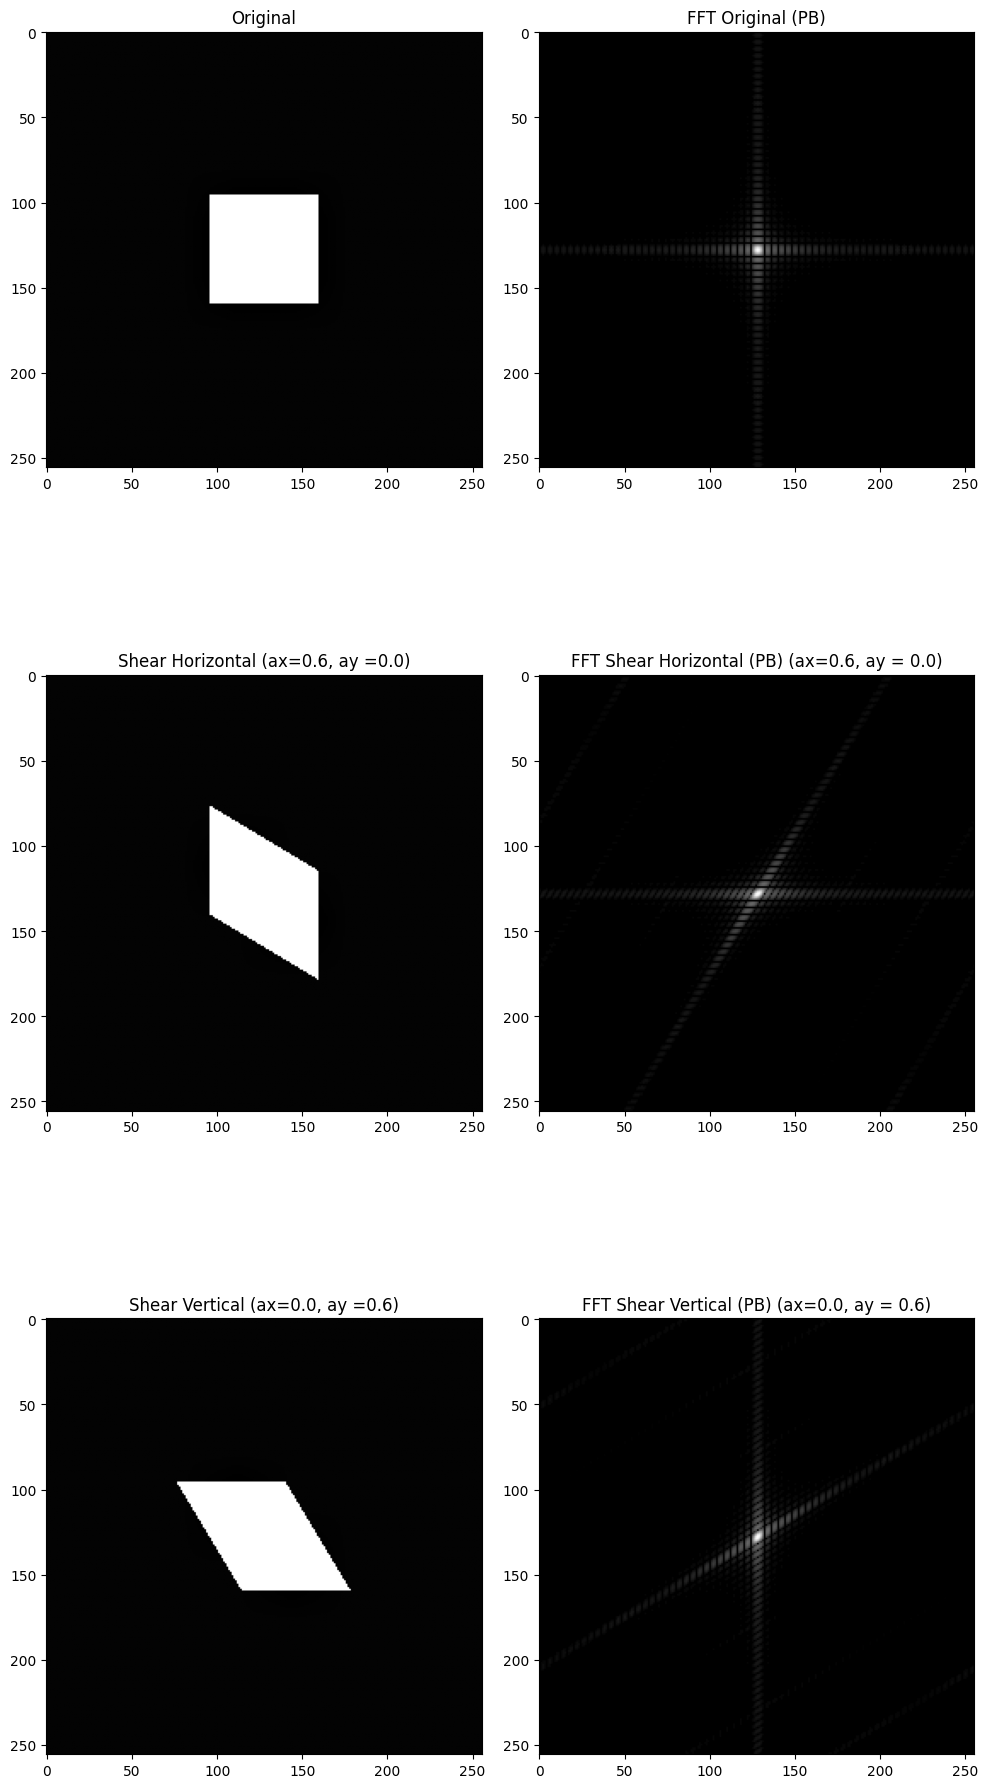

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

axs = axs.flatten()

shear_x = shear_image(original, a=0.6, b=0)
shear_y = shear_image(original, a=0, b=0.6)

# Exemplo de uso ao exibir as imagens:
axs[0].imshow(enhance_contrast(original), cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(enhance_contrast(fft_magnitude(original)), cmap="gray")
axs[1].set_title("FFT Original (PB)")
axs[2].imshow(enhance_contrast(shear_x), cmap="gray")
axs[2].set_title("Shear Horizontal (ax=0.6, ay =0.0)")
axs[3].imshow(enhance_contrast(fft_magnitude(shear_x)), cmap="gray")
axs[3].set_title("FFT Shear Horizontal (PB) (ax=0.6, ay = 0.0)")
axs[4].imshow(enhance_contrast(shear_y), cmap="gray")
axs[4].set_title("Shear Vertical (ax=0.0, ay =0.6)")
axs[5].imshow(enhance_contrast(fft_magnitude(shear_y)), cmap="gray")
axs[5].set_title("FFT Shear Vertical (PB) ay=0.6")

plt.tight_layout()
plt.show()